In [1]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Loading data

In [5]:
forest=pd.read_csv(r"C:\Users\Shiva\Desktop\ExcelR assignments\Neural Network\forestfires.csv")

In [6]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
### Checking for null values in the data

In [8]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
### There are no null values in the data

In [10]:
### Distributions of the independant features

<Axes: xlabel='area', ylabel='Density'>

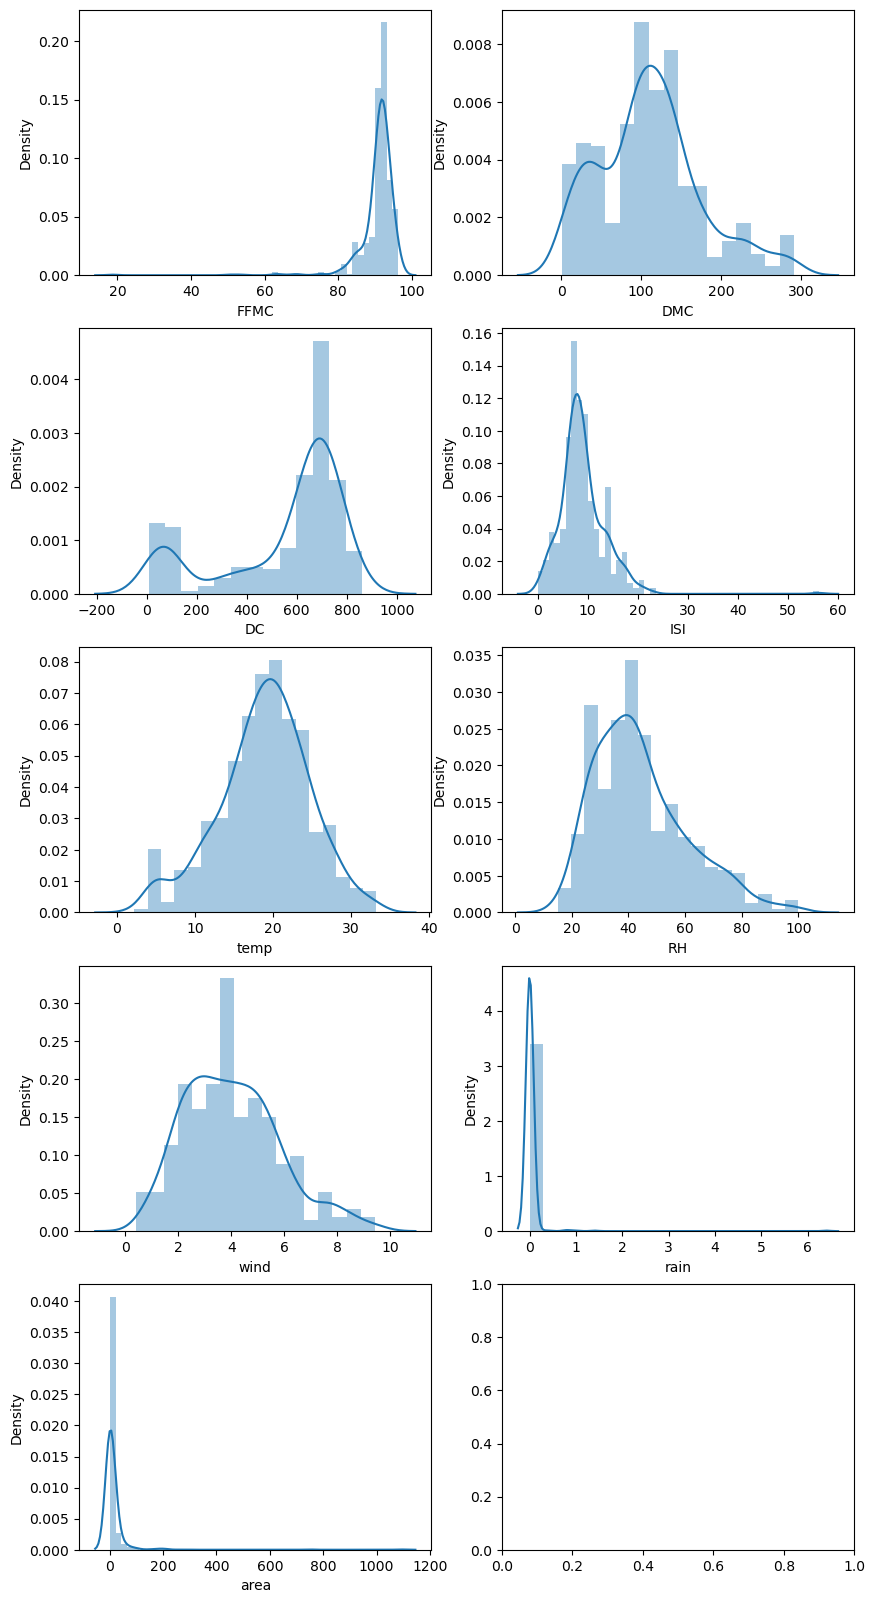

In [11]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest.FFMC,ax=axs[0,0])
sns.distplot(forest.DMC,ax=axs[0,1])
sns.distplot(forest.DC,ax=axs[1,0])
sns.distplot(forest.ISI,ax=axs[1,1])
sns.distplot(forest.temp,ax=axs[2,0])
sns.distplot(forest.RH,ax=axs[2,1])
sns.distplot(forest.wind,ax=axs[3,0])
sns.distplot(forest.rain,ax=axs[3,1])
sns.distplot(forest.area,ax=axs[4,0])

In [12]:
forest.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [13]:
### Label encoding the size category column

In [14]:
forest.loc[forest.size_category=='small','size_category']=0
forest.loc[forest.size_category=='large','size_category']=1

In [15]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
### Dropping month and day columns since they are already present as dummy columns

In [17]:
forest.drop(['month','day'],axis=1,inplace=True)

In [18]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
### Splitting dependant and independant variables

In [20]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [22]:
y=y.astype('float')

In [23]:
### Using standard scaler

In [24]:
ss=preprocessing.StandardScaler()

In [25]:
x=ss.fit_transform(x)

### Building model

In [26]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250


7/7 [==============================] - 2s 50ms/step - loss: 0.9808 - accuracy: 0.2630 - val_loss: 0.7472 - val_accuracy: 0.4152
Epoch 2/250
7/7 [==============================] - 0s 12ms/step - loss: 0.8320 - accuracy: 0.3584 - val_loss: 0.6804 - val_accuracy: 0.5497
Epoch 3/250
7/7 [==============================] - 0s 11ms/step - loss: 0.7268 - accuracy: 0.5116 - val_loss: 0.6430 - val_accuracy: 0.6550
Epoch 4/250
7/7 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.6127 - val_loss: 0.6277 - val_accuracy: 0.6608
Epoch 5/250
7/7 [==============================] - 0s 11ms/step - loss: 0.6072 - accuracy: 0.7168 - val_loss: 0.6250 - val_accuracy: 0.6784
Epoch 6/250
7/7 [==============================] - 0s 14ms/step - loss: 0.5775 - accuracy: 0.7254 - val_loss: 0.6283 - val_accuracy: 0.6901
Epoch 7/250
7/7 [==============================] - 0s 11ms/step - loss: 0.5550 - accuracy: 0.7312 - val_loss: 0.6329 - val_accuracy: 0.6959
Epoch 8/250
7/7 [=

Epoch 56/250
7/7 [==============================] - 0s 11ms/step - loss: 0.2792 - accuracy: 0.8815 - val_loss: 0.6592 - val_accuracy: 0.7485
Epoch 57/250
7/7 [==============================] - 0s 11ms/step - loss: 0.2750 - accuracy: 0.8844 - val_loss: 0.6628 - val_accuracy: 0.7485
Epoch 58/250
7/7 [==============================] - 0s 11ms/step - loss: 0.2690 - accuracy: 0.8902 - val_loss: 0.6672 - val_accuracy: 0.7485
Epoch 59/250
7/7 [==============================] - 0s 11ms/step - loss: 0.2635 - accuracy: 0.8931 - val_loss: 0.6710 - val_accuracy: 0.7485
Epoch 60/250
7/7 [==============================] - 0s 10ms/step - loss: 0.2584 - accuracy: 0.8988 - val_loss: 0.6741 - val_accuracy: 0.7485
Epoch 61/250
7/7 [==============================] - 0s 10ms/step - loss: 0.2527 - accuracy: 0.8988 - val_loss: 0.6785 - val_accuracy: 0.7485
Epoch 62/250
7/7 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.8988 - val_loss: 0.6831 - val_accuracy: 0.7485
Epoch 63/250


7/7 [==============================] - 0s 10ms/step - loss: 0.0806 - accuracy: 0.9769 - val_loss: 0.9445 - val_accuracy: 0.8012
Epoch 115/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0784 - accuracy: 0.9769 - val_loss: 0.9477 - val_accuracy: 0.8070
Epoch 116/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0773 - accuracy: 0.9769 - val_loss: 0.9520 - val_accuracy: 0.8129
Epoch 117/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0760 - accuracy: 0.9798 - val_loss: 0.9587 - val_accuracy: 0.8129
Epoch 118/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0742 - accuracy: 0.9798 - val_loss: 0.9596 - val_accuracy: 0.8070
Epoch 119/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0726 - accuracy: 0.9769 - val_loss: 0.9688 - val_accuracy: 0.8070
Epoch 120/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0709 - accuracy: 0.9798 - val_loss: 0.9731 - val_accuracy: 0.8070
Epoch 121/250
7/7 [=

Epoch 172/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 1.1998 - val_accuracy: 0.8246
Epoch 173/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 1.2032 - val_accuracy: 0.8363
Epoch 174/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.2068 - val_accuracy: 0.8246
Epoch 175/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 1.2089 - val_accuracy: 0.8363
Epoch 176/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 1.2181 - val_accuracy: 0.8363
Epoch 177/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 1.2207 - val_accuracy: 0.8246
Epoch 178/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 1.2251 - val_accuracy: 0.8304
Epoch 

Epoch 230/250
7/7 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.4348 - val_accuracy: 0.8246
Epoch 231/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.4393 - val_accuracy: 0.8246
Epoch 232/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.4414 - val_accuracy: 0.8246
Epoch 233/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4448 - val_accuracy: 0.8246
Epoch 234/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.4515 - val_accuracy: 0.8246
Epoch 235/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.4541 - val_accuracy: 0.8246
Epoch 236/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.4571 - val_accuracy: 0.8246
Epoch 2

In [30]:
model.evaluate(x,y)

17/17 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.9420


[0.5028961300849915, 0.9419729113578796]

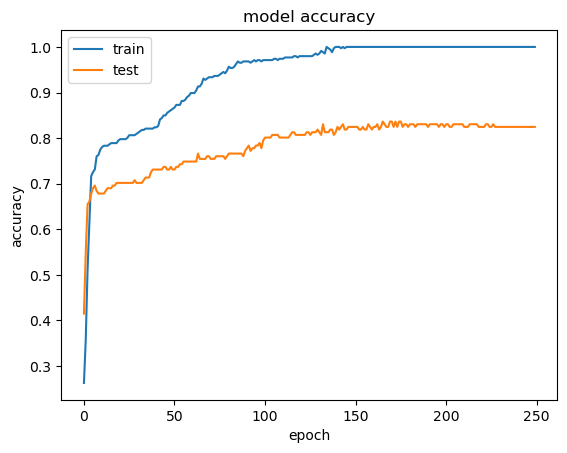

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The model has low validation accuracy

### Building a new model with reduced number of hidden layer nodes

In [32]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 42ms/step - loss: 0.5892 - accuracy: 0.7572 - val_loss: 0.6821 - val_accuracy: 0.6784
Epoch 2/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5709 - accuracy: 0.7601 - val_loss: 0.6847 - val_accuracy: 0.6784
Epoch 3/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5556 - accuracy: 0.7601 - val_loss: 0.6879 - val_accuracy: 0.6784
Epoch 4/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5444 - accuracy: 0.7630 - val_loss: 0.6895 - val_accuracy: 0.6784
Epoch 5/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5314 - accuracy: 0.7630 - val_loss: 0.6921 - val_accuracy: 0.6784
Epoch 6/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5220 - accuracy: 0.7630 - val_loss: 0.6947 - val_accuracy: 0.6784
Epoch 7/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5129 - accuracy: 0.7630 - val_loss: 0.6963 - val_accuracy: 0.6784
Epoch 8/250
7/7 [===

7/7 [==============================] - 0s 11ms/step - loss: 0.0685 - accuracy: 0.9855 - val_loss: 1.2349 - val_accuracy: 0.7778
Epoch 118/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0675 - accuracy: 0.9827 - val_loss: 1.2434 - val_accuracy: 0.7778
Epoch 119/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0661 - accuracy: 0.9827 - val_loss: 1.2491 - val_accuracy: 0.7719
Epoch 120/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0650 - accuracy: 0.9855 - val_loss: 1.2540 - val_accuracy: 0.7778
Epoch 121/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0634 - accuracy: 0.9855 - val_loss: 1.2611 - val_accuracy: 0.7719
Epoch 122/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9827 - val_loss: 1.2709 - val_accuracy: 0.7719
Epoch 123/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0631 - accuracy: 0.9884 - val_loss: 1.2762 - val_accuracy: 0.7719
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 1.5526 - val_accuracy: 0.7953
Epoch 176/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 1.5505 - val_accuracy: 0.8012
Epoch 177/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 1.5625 - val_accuracy: 0.8012
Epoch 178/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 1.5672 - val_accuracy: 0.8012
Epoch 179/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 1.5717 - val_accuracy: 0.8012
Epoch 180/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 1.5796 - val_accuracy: 0.8012
Epoch 181/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 1.5806 - val_accuracy: 0.8012
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.8287 - val_accuracy: 0.8129
Epoch 234/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.8343 - val_accuracy: 0.8129
Epoch 235/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.8384 - val_accuracy: 0.8129
Epoch 236/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.8431 - val_accuracy: 0.8129
Epoch 237/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.8512 - val_accuracy: 0.8129
Epoch 238/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 1.8557 - val_accuracy: 0.8129
Epoch 239/250
7/7 [==============================] - 0s 20ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.8597 - val_accuracy: 0.8129
Epoch 

In [34]:
model2.evaluate(x,y)

17/17 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.9381


[0.6374955773353577, 0.9381044507026672]

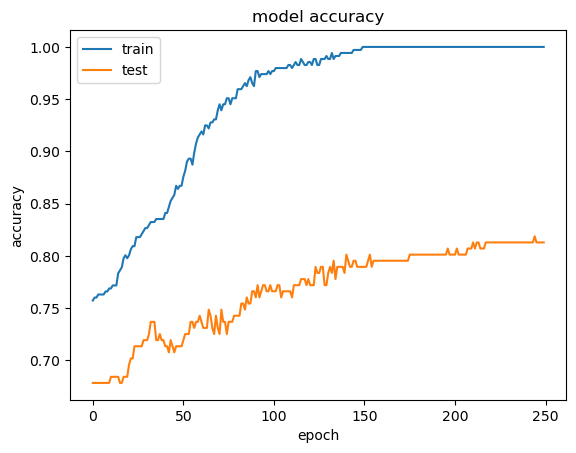

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Validation accuracy didnt improve

In [36]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

### Dropping day dummy columns from the data 

In [37]:
x=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','size_category'],axis=1)

In [38]:
y=y=forest.iloc[:,-1]

In [39]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthapr,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Building a new model for the new data

In [40]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model4=Sequential()
model4.add(Dense(21,  activation='relu'))
model4.add(Dense(15,  activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model4.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 44ms/step - loss: 0.6840 - accuracy: 0.5405 - val_loss: 0.6631 - val_accuracy: 0.6199
Epoch 2/250
7/7 [==============================] - 0s 11ms/step - loss: 0.6430 - accuracy: 0.6474 - val_loss: 0.6453 - val_accuracy: 0.6257
Epoch 3/250
7/7 [==============================] - 0s 12ms/step - loss: 0.6110 - accuracy: 0.7139 - val_loss: 0.6369 - val_accuracy: 0.6550
Epoch 4/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5860 - accuracy: 0.7370 - val_loss: 0.6357 - val_accuracy: 0.6784
Epoch 5/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5663 - accuracy: 0.7514 - val_loss: 0.6394 - val_accuracy: 0.6725
Epoch 6/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5505 - accuracy: 0.7543 - val_loss: 0.6459 - val_accuracy: 0.6784
Epoch 7/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5371 - accuracy: 0.7543 - val_loss: 0.6534 - val_accuracy: 0.6784
Epoch 8/250
7/7 [===

7/7 [==============================] - 0s 11ms/step - loss: 0.1234 - accuracy: 0.9653 - val_loss: 0.9952 - val_accuracy: 0.8596
Epoch 118/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1207 - accuracy: 0.9653 - val_loss: 1.0017 - val_accuracy: 0.8655
Epoch 119/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1196 - accuracy: 0.9682 - val_loss: 1.0096 - val_accuracy: 0.8596
Epoch 120/250
7/7 [==============================] - 0s 12ms/step - loss: 0.1166 - accuracy: 0.9653 - val_loss: 1.0168 - val_accuracy: 0.8596
Epoch 121/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1162 - accuracy: 0.9653 - val_loss: 1.0235 - val_accuracy: 0.8655
Epoch 122/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1137 - accuracy: 0.9653 - val_loss: 1.0252 - val_accuracy: 0.8596
Epoch 123/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1109 - accuracy: 0.9711 - val_loss: 1.0301 - val_accuracy: 0.8596
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0479 - accuracy: 0.9971 - val_loss: 1.3884 - val_accuracy: 0.8713
Epoch 176/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0474 - accuracy: 0.9971 - val_loss: 1.3920 - val_accuracy: 0.8713
Epoch 177/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0466 - accuracy: 0.9971 - val_loss: 1.3999 - val_accuracy: 0.8713
Epoch 178/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0464 - accuracy: 0.9971 - val_loss: 1.4054 - val_accuracy: 0.8772
Epoch 179/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0452 - accuracy: 0.9971 - val_loss: 1.4127 - val_accuracy: 0.8713
Epoch 180/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0451 - accuracy: 0.9942 - val_loss: 1.4161 - val_accuracy: 0.8713
Epoch 181/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0441 - accuracy: 0.9942 - val_loss: 1.4240 - val_accuracy: 0.8713
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.7187 - val_accuracy: 0.8713
Epoch 234/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 1.7263 - val_accuracy: 0.8772
Epoch 235/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 1.7308 - val_accuracy: 0.8713
Epoch 236/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 1.7363 - val_accuracy: 0.8713
Epoch 237/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0231 - accuracy: 0.9971 - val_loss: 1.7433 - val_accuracy: 0.8713
Epoch 238/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0227 - accuracy: 0.9971 - val_loss: 1.7460 - val_accuracy: 0.8713
Epoch 239/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.7491 - val_accuracy: 0.8772
Epoch 

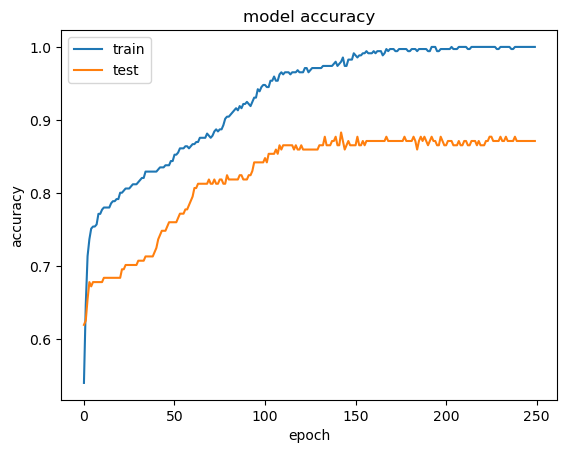

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### From the graph it can be inferred that the validation accuracy improved to 0.91

### So model4 is taken as the final model

In [43]:
model_final=model4